<a href="https://colab.research.google.com/github/nikishkaaa/ML-Course/blob/main/HW_2_7_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [59]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [8]:
od.version()

'0.1.22'

In [9]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data'

In [10]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darianikishkina
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 66.2MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu/bank-customer-churn-prediction-dlu.zip to ./bank-customer-churn-prediction-dlu


In [11]:
data_dir = './bank-customer-churn-prediction-dlu'

In [12]:
os.listdir(data_dir)

['sample_submission.csv', 'train.csv', 'test.csv']

In [13]:
raw_data = pd.read_csv('bank-customer-churn-prediction-dlu/train.csv')
raw_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [15]:
target = raw_data['Exited']

In [16]:
train, valid = train_test_split(raw_data, random_state=42, test_size=0.2, stratify = target)

In [17]:
print(train.shape)
print(valid.shape)

(12000, 14)
(3000, 14)


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [119]:
target_cols = pd.DataFrame(target).columns
input_cols = list(train.columns)[2:-1]

In [120]:
train_inputs = pd.DataFrame(train[input_cols])
train_targets = pd.DataFrame(train[target_cols])
val_inputs = pd.DataFrame(valid[input_cols])
val_targets = pd.DataFrame(valid[target_cols])

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [121]:
numeric_cols = train_inputs.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_inputs.select_dtypes(exclude=[np.number]).columns.tolist()

In [122]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,658.84,37.69,5.03,43008.17,1.59,0.79,0.49,117992.40
std,72.33,8.14,2.78,59906.63,0.53,0.41,0.50,45589.48
min,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83343.73
50%,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123613.91
75%,708.00,42.00,7.00,109949.05,2.00,1.00,1.00,156912.81
max,850.00,74.00,10.00,209767.31,4.00,1.00,1.00,199992.48


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

#### Маштабування числових ознак

In [123]:
scaler = MinMaxScaler()

In [124]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [125]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

In [126]:
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [127]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.54,0.35,0.50,0.21,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.29,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.34,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.43,0.70,0.52,0.33,1.00,1.00,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Кодування категоріальних ознак

In [128]:
raw_data[categorical_cols].nunique()

Surname      764
Geography      3
Gender         2
dtype: int64



 Surname - вилучаємо, бо для моделі немає сенсу кодувати цю змінну. Інші категоріальні змінні - кодуємо


In [129]:
categorical_cols = ['Geography', 'Gender']

In [130]:
train_inputs = train_inputs.drop('Surname', axis = 1)

In [131]:
val_inputs = val_inputs.drop('Surname', axis = 1)

In [132]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [133]:
encoder.fit(raw_data[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [134]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [135]:
encoder_cols = list(encoder.get_feature_names_out(categorical_cols))
encoder_cols

['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [136]:
train_inputs[encoder_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoder_cols] = encoder.transform(val_inputs[categorical_cols])

In [137]:
val_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,0.589499,France,Male,0.357143,0.4,0.000000,0.333333,1.0,0.0,0.667682,1.0,0.0,0.0,0.0,1.0
8866,0.768496,France,Male,0.642857,0.6,0.000000,0.000000,1.0,0.0,0.885353,1.0,0.0,0.0,0.0,1.0
3244,0.589499,Spain,Male,0.250000,0.5,0.000000,0.333333,1.0,0.0,0.883589,0.0,0.0,1.0,0.0,1.0
12441,0.699284,Spain,Male,0.267857,0.5,0.658646,0.000000,1.0,0.0,0.528593,0.0,0.0,1.0,0.0,1.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [138]:
!pip install pyarrow --quiet

In [139]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [140]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 30.8 ms


In [141]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')['Exited']
val_targets = pd.read_parquet('val_targets.parquet')['Exited']

CPU times: user 37 ms, sys: 6.89 ms, total: 43.9 ms
Wall time: 70.2 ms


In [142]:
train_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,France,Female,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
8463,0.577566,France,Female,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,1.0,0.0
8143,0.453461,France,Male,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0
11512,0.379475,Spain,Male,0.428571,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,0.0,1.0


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [143]:
X_train = train_inputs.drop(['Geography', 'Gender'], axis = 1)
X_val = val_inputs.drop(['Geography', 'Gender'], axis = 1)

In [144]:
from sklearn.linear_model import  LogisticRegression

In [145]:
model = LogisticRegression(solver = 'liblinear')

In [146]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [147]:
trains_pred = model.predict(X_train)
trains_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [148]:
val_preds = model.predict(X_val)
val_preds

array([0., 0., 0., ..., 0., 0., 0.])

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

 #### Confusion matrix

In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
confusion_matrix(train_targets, trains_pred)

array([[9177,  381],
       [1128, 1314]])

In [151]:
confusion_matrix(val_targets, val_preds)

array([[2271,  119],
       [ 266,  344]])

#### F1 Score

In [152]:
from sklearn.metrics import f1_score

In [153]:
f1_score(train_targets, trains_pred, pos_label = 1.0)

0.6352429296591733

In [154]:
f1_score(val_targets, val_preds, pos_label = 1.0)

0.641192917054986

#### ROC Curve + AUROC


In [155]:
from sklearn.metrics import roc_curve, auc

In [156]:
def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

In [157]:
y_pred_proba = model.predict_proba(X_train)[:, 1]
y_pred_proba

array([0.01464177, 0.27092741, 0.12759346, ..., 0.0072396 , 0.16843937,
       0.05048414])

In [158]:
fpr, tpr, thresholds = roc_curve(train_targets, y_pred_proba, pos_label=1.0)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99299017, 1.        ,
        1.        ]),
 array([0.00000000e+00, 4.09500410e-04, 2.86650287e-03, ...,
        9.99590500e-01, 9.99590500e-01, 1.00000000e+00]),
 array([       inf, 0.99237017, 0.98766285, ..., 0.00305023, 0.0014393 ,
        0.00141861]))

AUROC for Training: 0.88


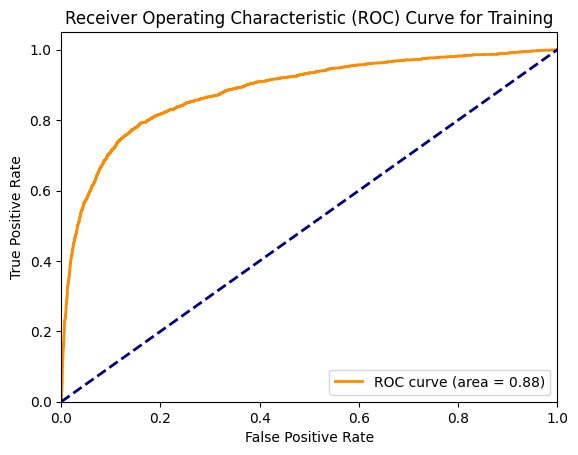

AUROC for Validation: 0.88


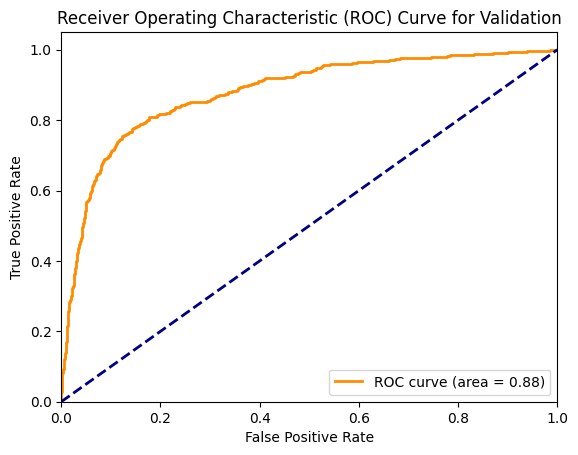

In [159]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

#### Висновок: модель працює дуже добре, так як AROC = 0.88, а Fscore = 0.63 та різниця між показниками метрик для тренувально і валідаційнго наборів даних майже не відрізняються

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [160]:
def all_null(inputs):
    return np.full(len(inputs), 0)

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, all_null(X_train))

0.7965

In [162]:
accuracy_score(val_targets, all_null(X_val))

0.7966666666666666

Значення метрики моделі є кращим порівняно із заповненням мажоритарним класом, отже наша модель працює краще

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [163]:
import joblib

In [164]:
bank_churn_prediction = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoder_cols
}

In [165]:
joblib.dump(bank_churn_prediction , 'log_reg.joblib')

['log_reg.joblib']

In [166]:
model2 = joblib.load('log_reg.joblib')

In [167]:
model2['model']

LogisticRegression(solver='liblinear')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [168]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoder_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoder_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [169]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_data[:5])

array([0.00654092, 0.0366679 , 0.37111937, 0.37653484, 0.97577854])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [170]:
data_dir = './bank-customer-churn-prediction-dlu'
test_csv = data_dir + '/test.csv'
test_raw_df = pd.read_csv(test_csv)
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [171]:
test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,0.365155,Germany,Male,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,0.075316
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,0.035366
2,15002,15716284.0,Onyekachi,0.656325,France,Male,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,0.153210
3,15003,15785078.0,Martin,0.682578,Spain,Male,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,0.194872
4,15004,15662955.0,Kenechukwu,0.384248,Spain,Male,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,0.055660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,0.496420,Spain,Male,0.357143,1.0,0.000000,0.333333,1.0,1.0,0.248154,0.0,0.0,1.0,0.0,1.0,0.022145
9996,24996,15739271.0,Clements,0.589499,Spain,Male,0.375000,0.9,0.000000,0.333333,1.0,1.0,0.712578,0.0,0.0,1.0,0.0,1.0,0.026017
9997,24997,15756743.0,Chidiebere,0.818616,France,Male,0.214286,0.9,0.000000,0.333333,1.0,0.0,0.024253,1.0,0.0,0.0,0.0,1.0,0.018623
9998,24998,15680167.0,Yermakova,0.391408,France,Male,0.357143,0.6,0.690650,0.000000,1.0,0.0,0.632348,1.0,0.0,0.0,0.0,1.0,0.155567


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [175]:
sample_submission = pd.read_csv('bank-customer-churn-prediction-dlu/sample_submission.csv')
sample_submission.head(5)

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [174]:
merged_df = sample_submission.merge(test_raw_df, on='id', how='left')
merged_df.head(5)

,id,Exited_x,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited_y
0,15000,0.5,15594796.0,Chu,0.365155,Germany,Male,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,0.075316
1,15001,0.5,15642821.0,Mazzi,0.286396,France,Male,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,0.035366
2,15002,0.5,15716284.0,Onyekachi,0.656325,France,Male,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,0.153210
3,15003,0.5,15785078.0,Martin,0.682578,Spain,Male,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,0.194872
4,15004,0.5,15662955.0,Kenechukwu,0.384248,Spain,Male,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,0.055660


In [178]:
merged_df.to_csv('submission_log_reg2.csv', index=False)